In [1]:
!pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 7.4 kB/s s eta 0:00:0102
     |████████████████████████████████| 6.0 MB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 83.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 24 kB/s s eta 0:00:01
     |████████████████████████████████| 2.9 MB 91.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 84.2 MB/s eta 0:00:01
ERROR: torch-tb-profiler 0.1.0 has requirement pandas>=1.0.0, but you'll have pandas 0.25.3 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.2 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.5.0 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
!pip install --upgrade tensorflow 

     |████████████████████████████████| 454.3 MB 9.3 kB/s  eta 0:00:012
     |████████████████████████████████| 462 kB 93.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 90.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 13 kB/s s eta 0:00:01
ERROR: tensorflow-gpu 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.2 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.5.0 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow-estimator
    Found existi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
!python -m pip install -U pillow
!python -m pip install -U albumentations
!python -m pip install -U segmentation-models
!python -m pip install azureml-sdk[notebooks]
!pip install azureml-contrib-services
!pip install opencv-python

Requirement already up-to-date: pillow in /anaconda/envs/azureml_py36/lib/python3.6/site-packages (8.2.0)
     |████████████████████████████████| 98 kB 3.6 MB/s  eta 0:00:01
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7
     |████████████████████████████████| 109 kB 18.5 MB/s eta 0:00:01
  Attempting uninstall: parso
    Found existing installation: parso 0.8.2
    Uninstalling parso-0.8.2:
      Successfully uninstalled parso-0.8.2


In [1]:
# List of packages
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import os, uuid
#import azureml.core

from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__
from azureml.core import Workspace, Dataset, Datastore

import random

import albumentations as A

import segmentation_models as sm

from P8_01_GenerateurData_class import GenerateurData
from P8_01_GenerateurDatasasansaug_class import GenerateurDatasansaug

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Segmentation Models: using `tf.keras` framework.


In [5]:
print(tf.keras.__version__)

2.5.0


In [6]:
import azureml.core
print(azureml.core.VERSION)

1.28.0


In [7]:
print(tf.version.VERSION)

2.5.0


# Données images

In [8]:
# load data from blob
# azureml-core version 1.0.72 ou supérieure obligatoire
subscription_id = '75c51acd-24dc-4674-9a83-dd6319951bf8'
resource_group = 'cloud-shell-storage-westeurope'
workspace_name = 'WS_P8_JCROSELLO'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='train')
dataset.download(target_path='./train', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000000_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000001_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000002_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000003_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000004_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000005_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_000006_000019_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/train/aachen_

In [2]:
train = os.listdir('./train/')

In [3]:
train

['aachen_000000_000019_leftImg8bit.png',
 'aachen_000001_000019_leftImg8bit.png',
 'aachen_000002_000019_leftImg8bit.png',
 'aachen_000003_000019_leftImg8bit.png',
 'aachen_000004_000019_leftImg8bit.png',
 'aachen_000005_000019_leftImg8bit.png',
 'aachen_000006_000019_leftImg8bit.png',
 'aachen_000007_000019_leftImg8bit.png',
 'aachen_000008_000019_leftImg8bit.png',
 'aachen_000009_000019_leftImg8bit.png',
 'aachen_000010_000019_leftImg8bit.png',
 'aachen_000011_000019_leftImg8bit.png',
 'aachen_000012_000019_leftImg8bit.png',
 'aachen_000013_000019_leftImg8bit.png',
 'aachen_000014_000019_leftImg8bit.png',
 'aachen_000015_000019_leftImg8bit.png',
 'aachen_000016_000019_leftImg8bit.png',
 'aachen_000017_000019_leftImg8bit.png',
 'aachen_000018_000019_leftImg8bit.png',
 'aachen_000019_000019_leftImg8bit.png',
 'aachen_000020_000019_leftImg8bit.png',
 'aachen_000021_000019_leftImg8bit.png',
 'aachen_000022_000019_leftImg8bit.png',
 'aachen_000023_000019_leftImg8bit.png',
 'aachen_000024_

In [4]:
len(train)

2975

In [12]:
# load data from blob
# azureml-core version 1.0.72 ou supérieure obligatoire
subscription_id = '75c51acd-24dc-4674-9a83-dd6319951bf8'
resource_group = 'cloud-shell-storage-westeurope'
workspace_name = 'WS_P8_JCROSELLO'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='trainLabel')
dataset.download(target_path='./trainLabel', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000000_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000001_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000002_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000003_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000004_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000005_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainLabel/aachen_000006_000019_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/

In [5]:
trainLabel = os.listdir('./trainLabel/')

In [6]:
trainLabel

['aachen_000000_000019_gtFine_labelIds.png',
 'aachen_000001_000019_gtFine_labelIds.png',
 'aachen_000002_000019_gtFine_labelIds.png',
 'aachen_000003_000019_gtFine_labelIds.png',
 'aachen_000004_000019_gtFine_labelIds.png',
 'aachen_000005_000019_gtFine_labelIds.png',
 'aachen_000006_000019_gtFine_labelIds.png',
 'aachen_000007_000019_gtFine_labelIds.png',
 'aachen_000008_000019_gtFine_labelIds.png',
 'aachen_000009_000019_gtFine_labelIds.png',
 'aachen_000010_000019_gtFine_labelIds.png',
 'aachen_000011_000019_gtFine_labelIds.png',
 'aachen_000012_000019_gtFine_labelIds.png',
 'aachen_000013_000019_gtFine_labelIds.png',
 'aachen_000014_000019_gtFine_labelIds.png',
 'aachen_000015_000019_gtFine_labelIds.png',
 'aachen_000016_000019_gtFine_labelIds.png',
 'aachen_000017_000019_gtFine_labelIds.png',
 'aachen_000018_000019_gtFine_labelIds.png',
 'aachen_000019_000019_gtFine_labelIds.png',
 'aachen_000020_000019_gtFine_labelIds.png',
 'aachen_000021_000019_gtFine_labelIds.png',
 'aachen_0

In [7]:
len(trainLabel)

2975

In [16]:
# load data from blob
# azureml-core version 1.0.72 ou supérieure obligatoire
subscription_id = '75c51acd-24dc-4674-9a83-dd6319951bf8'
resource_group = 'cloud-shell-storage-westeurope'
workspace_name = 'WS_P8_JCROSELLO'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='val')
dataset.download(target_path='./val', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_000294_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_000576_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_001016_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_001236_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_001751_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_002196_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/frankfurt_000000_002963_leftImg8bit.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/val/fr

In [8]:
val = os.listdir('./val/')

In [9]:
val

['frankfurt_000000_000294_leftImg8bit.png',
 'frankfurt_000000_000576_leftImg8bit.png',
 'frankfurt_000000_001016_leftImg8bit.png',
 'frankfurt_000000_001236_leftImg8bit.png',
 'frankfurt_000000_001751_leftImg8bit.png',
 'frankfurt_000000_002196_leftImg8bit.png',
 'frankfurt_000000_002963_leftImg8bit.png',
 'frankfurt_000000_003025_leftImg8bit.png',
 'frankfurt_000000_003357_leftImg8bit.png',
 'frankfurt_000000_003920_leftImg8bit.png',
 'frankfurt_000000_004617_leftImg8bit.png',
 'frankfurt_000000_005543_leftImg8bit.png',
 'frankfurt_000000_005898_leftImg8bit.png',
 'frankfurt_000000_006589_leftImg8bit.png',
 'frankfurt_000000_007365_leftImg8bit.png',
 'frankfurt_000000_008206_leftImg8bit.png',
 'frankfurt_000000_008451_leftImg8bit.png',
 'frankfurt_000000_009291_leftImg8bit.png',
 'frankfurt_000000_009561_leftImg8bit.png',
 'frankfurt_000000_009688_leftImg8bit.png',
 'frankfurt_000000_009969_leftImg8bit.png',
 'frankfurt_000000_010351_leftImg8bit.png',
 'frankfurt_000000_010763_leftIm

In [10]:
len(val)

500

In [20]:
# load data from blob
# azureml-core version 1.0.72 ou supérieure obligatoire
subscription_id = '75c51acd-24dc-4674-9a83-dd6319951bf8'
resource_group = 'cloud-shell-storage-westeurope'
workspace_name = 'WS_P8_JCROSELLO'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='valLabel')
dataset.download(target_path='./valLabel', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_000294_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_000576_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_001016_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_001236_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_001751_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_002196_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valLabel/frankfurt_000000_002963_gtFine_labelIds.png',
 '/mnt/batch/tasks/shared/L

In [11]:
valLabel = os.listdir('./valLabel/')

In [12]:
valLabel

['frankfurt_000000_000294_gtFine_labelIds.png',
 'frankfurt_000000_000576_gtFine_labelIds.png',
 'frankfurt_000000_001016_gtFine_labelIds.png',
 'frankfurt_000000_001236_gtFine_labelIds.png',
 'frankfurt_000000_001751_gtFine_labelIds.png',
 'frankfurt_000000_002196_gtFine_labelIds.png',
 'frankfurt_000000_002963_gtFine_labelIds.png',
 'frankfurt_000000_003025_gtFine_labelIds.png',
 'frankfurt_000000_003357_gtFine_labelIds.png',
 'frankfurt_000000_003920_gtFine_labelIds.png',
 'frankfurt_000000_004617_gtFine_labelIds.png',
 'frankfurt_000000_005543_gtFine_labelIds.png',
 'frankfurt_000000_005898_gtFine_labelIds.png',
 'frankfurt_000000_006589_gtFine_labelIds.png',
 'frankfurt_000000_007365_gtFine_labelIds.png',
 'frankfurt_000000_008206_gtFine_labelIds.png',
 'frankfurt_000000_008451_gtFine_labelIds.png',
 'frankfurt_000000_009291_gtFine_labelIds.png',
 'frankfurt_000000_009561_gtFine_labelIds.png',
 'frankfurt_000000_009688_gtFine_labelIds.png',
 'frankfurt_000000_009969_gtFine_labelId

In [13]:
len(valLabel)

500

In [24]:
# load data from blob
# azureml-core version 1.0.72 ou supérieure obligatoire
subscription_id = '75c51acd-24dc-4674-9a83-dd6319951bf8'
resource_group = 'cloud-shell-storage-westeurope'
workspace_name = 'WS_P8_JCROSELLO'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='trainColor')
dataset.download(target_path='./trainColor', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000000_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000001_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000002_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000003_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000004_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000005_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/trainColor/aachen_000006_000019_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurem

In [14]:
trainColor = os.listdir('./trainColor/')

In [15]:
trainColor

['aachen_000000_000019_gtFine_color.png',
 'aachen_000001_000019_gtFine_color.png',
 'aachen_000002_000019_gtFine_color.png',
 'aachen_000003_000019_gtFine_color.png',
 'aachen_000004_000019_gtFine_color.png',
 'aachen_000005_000019_gtFine_color.png',
 'aachen_000006_000019_gtFine_color.png',
 'aachen_000007_000019_gtFine_color.png',
 'aachen_000008_000019_gtFine_color.png',
 'aachen_000009_000019_gtFine_color.png',
 'aachen_000010_000019_gtFine_color.png',
 'aachen_000011_000019_gtFine_color.png',
 'aachen_000012_000019_gtFine_color.png',
 'aachen_000013_000019_gtFine_color.png',
 'aachen_000014_000019_gtFine_color.png',
 'aachen_000015_000019_gtFine_color.png',
 'aachen_000016_000019_gtFine_color.png',
 'aachen_000017_000019_gtFine_color.png',
 'aachen_000018_000019_gtFine_color.png',
 'aachen_000019_000019_gtFine_color.png',
 'aachen_000020_000019_gtFine_color.png',
 'aachen_000021_000019_gtFine_color.png',
 'aachen_000022_000019_gtFine_color.png',
 'aachen_000023_000019_gtFine_colo

In [16]:
len(trainColor)

2975

In [28]:
# load data from blob
# azureml-core version 1.0.72 ou supérieure obligatoire
subscription_id = '75c51acd-24dc-4674-9a83-dd6319951bf8'
resource_group = 'cloud-shell-storage-westeurope'
workspace_name = 'WS_P8_JCROSELLO'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='valColor')
dataset.download(target_path='./valColor', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_000294_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_000576_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_001016_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_001236_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_001751_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_002196_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/clusters/aureml-cpu1/code/Users/jcrrosello/valColor/frankfurt_000000_002963_gtFine_color.png',
 '/mnt/batch/tasks/shared/LS_root/mounts/cluster

In [17]:
valColor = os.listdir('./valColor/')

In [18]:
valColor

['frankfurt_000000_000294_gtFine_color.png',
 'frankfurt_000000_000576_gtFine_color.png',
 'frankfurt_000000_001016_gtFine_color.png',
 'frankfurt_000000_001236_gtFine_color.png',
 'frankfurt_000000_001751_gtFine_color.png',
 'frankfurt_000000_002196_gtFine_color.png',
 'frankfurt_000000_002963_gtFine_color.png',
 'frankfurt_000000_003025_gtFine_color.png',
 'frankfurt_000000_003357_gtFine_color.png',
 'frankfurt_000000_003920_gtFine_color.png',
 'frankfurt_000000_004617_gtFine_color.png',
 'frankfurt_000000_005543_gtFine_color.png',
 'frankfurt_000000_005898_gtFine_color.png',
 'frankfurt_000000_006589_gtFine_color.png',
 'frankfurt_000000_007365_gtFine_color.png',
 'frankfurt_000000_008206_gtFine_color.png',
 'frankfurt_000000_008451_gtFine_color.png',
 'frankfurt_000000_009291_gtFine_color.png',
 'frankfurt_000000_009561_gtFine_color.png',
 'frankfurt_000000_009688_gtFine_color.png',
 'frankfurt_000000_009969_gtFine_color.png',
 'frankfurt_000000_010351_gtFine_color.png',
 'frankfur

In [19]:
len(valColor)

500

## Augmentation des données

In [20]:
def visu(transform_image, transform_mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(transform_image)
        ax[1].imshow(transform_mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(transform_image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(transform_mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

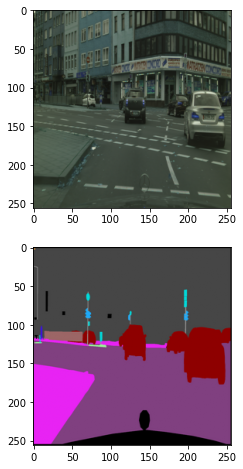

In [31]:
from skimage.transform import resize
#read image example
image = cv2.imread('./train/'+ train[3])
image = resize(image, (256, 256))
mask = cv2.imread('./trainColor/'+ trainColor[3])
mask = resize(mask, (256, 256))
visu(image, mask)

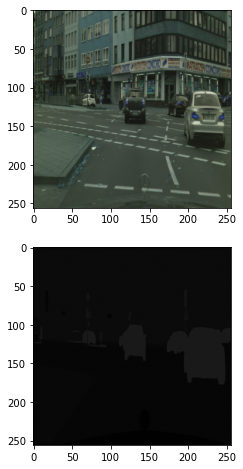

In [34]:
#read image example
image = cv2.imread('./train/'+ train[3])
image = resize(image, (256, 256))
maskLabel = cv2.imread('./trainLabel/'+ trainLabel[3])
maskLabel = resize(maskLabel, (256, 256))
visu(image, maskLabel)

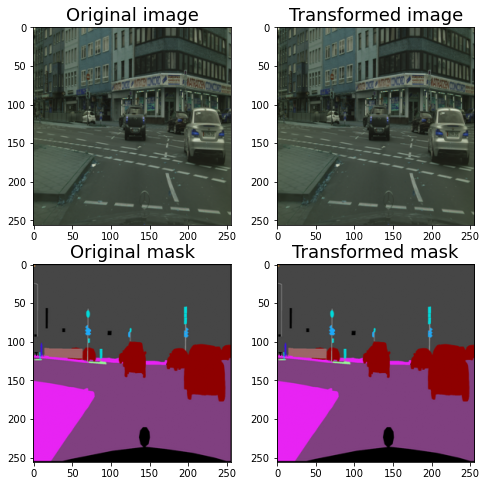

In [35]:
#random rotate
aug = A.RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visu(image_rot90, mask_rot90, original_image=image, original_mask=mask)

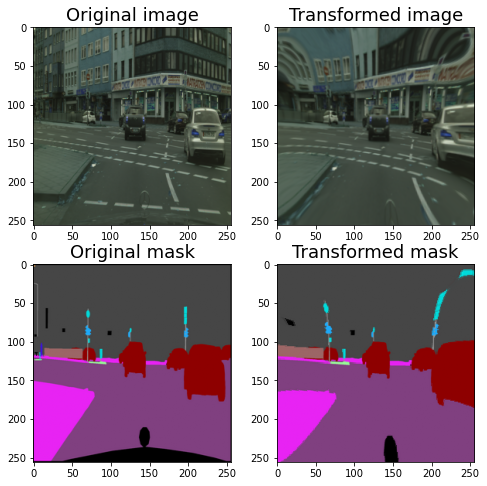

In [36]:
#optical distorsion
aug = A.OpticalDistortion(distort_limit=1, shift_limit=0.7, p=1)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visu(image_optical, mask_optical, original_image=image, original_mask=mask)

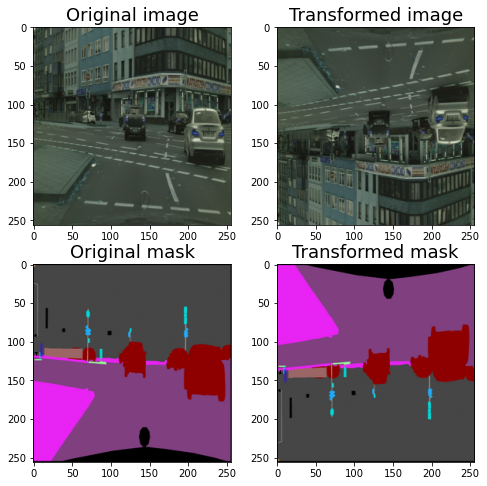

In [37]:
# Vertical flip
aug = A.VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visu(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

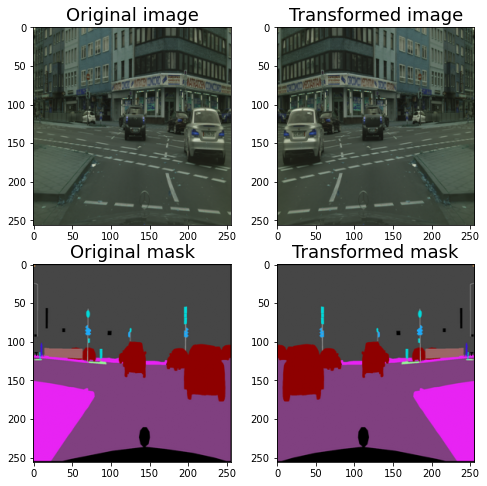

In [38]:
#horizontal flip
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visu(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

In [39]:
image.shape

(256, 256, 3)

In [40]:
mask.size

196608

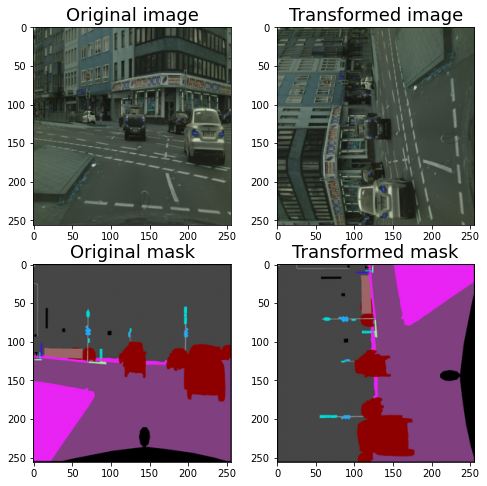

In [41]:
#Transpose
aug = A.Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visu(image_transposed, mask_transposed, original_image=image, original_mask=mask)

In [42]:
image_transposed.shape

(256, 256, 3)

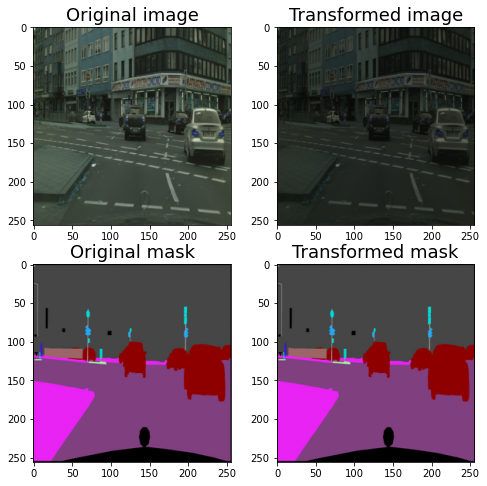

In [43]:
# random contrast
#optical distorsion
aug = A.RandomContrast(limit=0.7, p=1)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visu(image_optical, mask_optical, original_image=image, original_mask=mask)

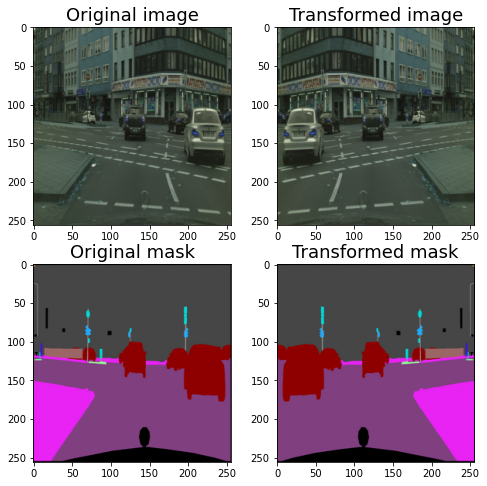

In [44]:
#combine different transformation
aug = A.Compose([
    A.HorizontalFlip(p=0.5),              
    A.OpticalDistortion(distort_limit=2, shift_limit=0.9, p=0.5),
    A.RandomContrast(limit=0.5, p=1)
    ]
)

random.seed(7)
augmented = aug(image=image, mask=mask)

image_light = augmented['image']
mask_light = augmented['mask']

visu(image_light, mask_light, original_image=image, original_mask=mask)

## Générateur de données

In [45]:
# Parameters
param = {'prob': 0.5,
          'batch_size': 32,
          'n_classes':8,
          'shuffle': False
         }

In [46]:
# Generators
train_gene = GenerateurData('./train/', './trainLabel/', train, trainLabel, **param)

In [47]:
len(train_gene)

92

In [48]:
X, y = train_gene[92]

In [49]:
X[0].shape

(256, 256, 3)

In [50]:
y[0].shape

(256, 256, 8)

In [51]:
image = cv2.imread('./train/aachen_000000_000019_leftImg8bit.png')

In [52]:
mask.shape

(256, 256, 3)

In [53]:
image.shape

(256, 512, 3)

In [54]:
from skimage.transform import resize

image = resize(image, (256, 256))

In [55]:
image.shape

(256, 256, 3)

In [56]:
pil_img = tf.keras.preprocessing.image.array_to_img(X[0])
#mask = tf.keras.preprocessing.image.array_to_img(y[0])
#pil_img.show()

In [57]:
#pil_img.show()

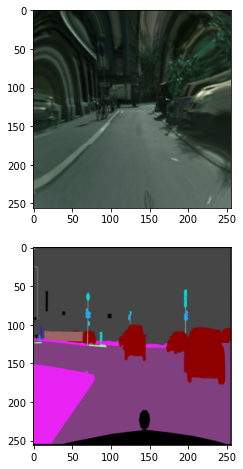

In [58]:
visu(pil_img, mask)

## Modèle de référence UNET

In [59]:
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 10

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)

58892288/58889256 [==============================] - 2s 0us/step


In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [61]:
mode_autosave = ModelCheckpoint('./outputsl/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks = [mode_autosave, lr_reducer, early_stopping]

In [62]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 
#focal_loss = sm.losses.CategoricalFocalLoss()
#total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
model.compile(
    optim,
    loss=dice_loss,
    metrics=metrics,
)


In [63]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurData('./train/', './trainLabel/', train, trainLabel, 
                                   **param)
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurData('./val/', './valLabel/',val, valLabel, 
                                     **param_val)

In [64]:
%%time
hist = model.fit_generator(train_gene, shuffle =True,
                  epochs=5, workers=4, use_multiprocessing=True,
                  validation_data = valid_gene, callbacks=callbacks,                    
                  verbose = 1)

Epoch 1/5
371/371 [==============================] - 2467s 7s/step - loss: 0.1360 - iou_score: 0.9926 - f1-score: 0.9928 - val_loss: 1.1296e-06 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl/checkpoint
Epoch 2/5
371/371 [==============================] - 2571s 7s/step - loss: 2.6441e-06 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 1.8458e-07 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/5
371/371 [==============================] - 2458s 7s/step - loss: 7.5092e-07 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 1.1921e-07 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/5
371/371 [==============================] - 2515s 7s/step - loss: 5.9074e-07 - io

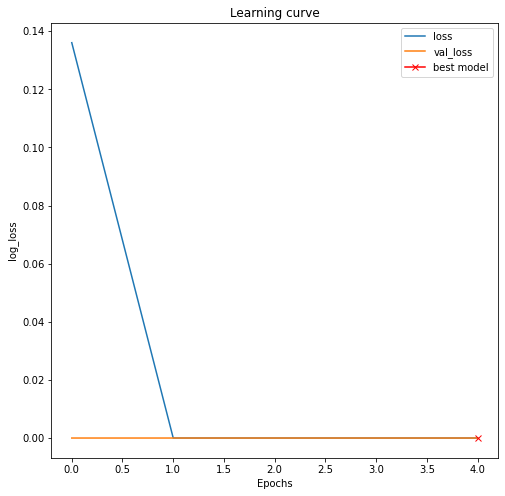

In [65]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(hist.history["val_loss"]), np.min(hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

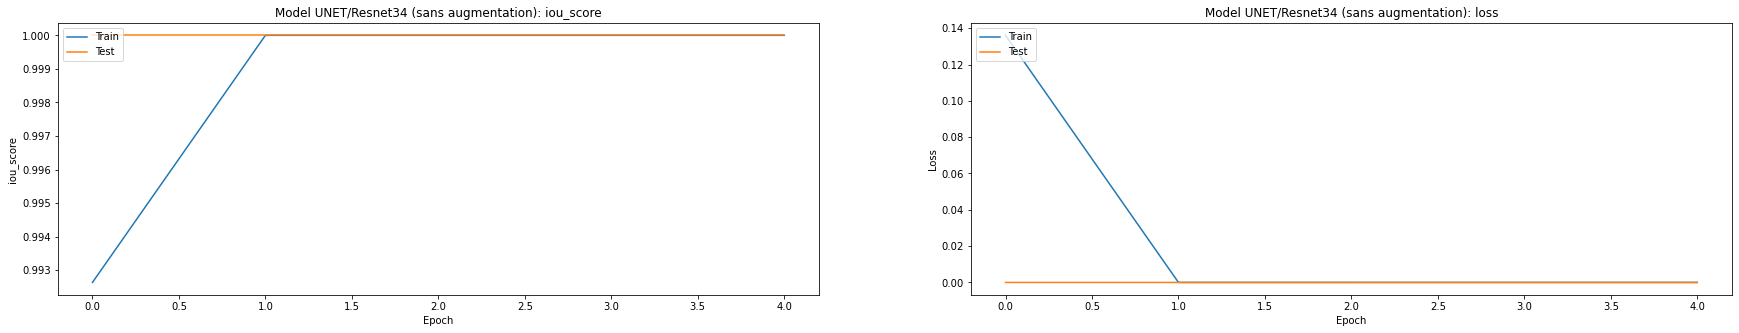

In [66]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hist.history['iou_score'])
plt.plot(hist.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (sans augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model UNET/Resnet34 (sans augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Modèle UNET Seresnet

In [67]:
# pre-processing function
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [68]:
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50

BACKBONE = 'seresnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model2 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, 
                input_shape=(256,256,3), classes=8, activation=activation)

86319104/86315168 [==============================] - 7s 0us/step


In [69]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [70]:
mode_autosave2 = ModelCheckpoint('./outputsl2/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer2 = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping2 = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks2 = [mode_autosave2, lr_reducer2, early_stopping2]

In [71]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)

model2.compile(
    optim,
    loss=dice_loss,
    metrics=metrics,
)


In [72]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurData('./train/', './trainLabel/', train, trainLabel, 
                                   **param, preprocessing=get_preprocessing(preprocess_input))
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurData('./val/', './valLabel/',val, valLabel, 
                                     **param_val, preprocessing=get_preprocessing(preprocess_input))

In [73]:
%%time
his1 = model2.fit_generator(train_gene, shuffle =True,
                  epochs=30, workers=4, use_multiprocessing=True,
                  validation_data = valid_gene, callbacks=callbacks2,                    
                  verbose = 1)

Epoch 1/30
371/371 [==============================] - 1375s 4s/step - loss: 0.1131 - iou_score: 0.9965 - f1-score: 0.9966 - val_loss: 0.0000e+00 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl2/checkpoint
Epoch 2/30
371/371 [==============================] - 1320s 4s/step - loss: 1.2853e-09 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.0000e+00 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/30
371/371 [==============================] - 1310s 4s/step - loss: 0.0000e+00 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 0.0000e+00 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/30
371/371 [==============================] - 1347s 4s/ste

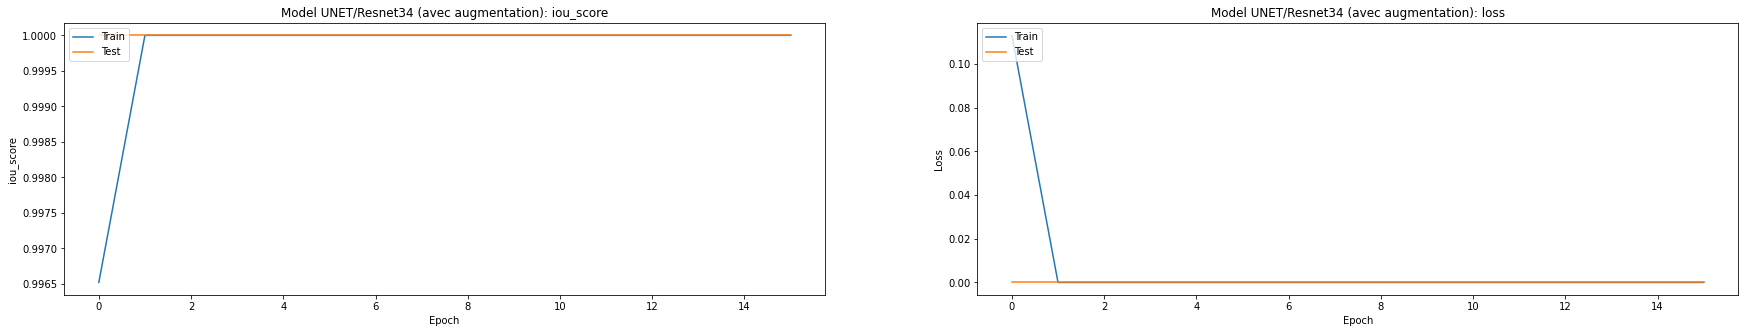

In [74]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(his1.history['iou_score'])
plt.plot(his1.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (avec augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(his1.history['loss'])
plt.plot(his1.history['val_loss'])
plt.title('Model UNET/Resnet34 (avec augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Modèle Unet avec Backbone:seresnet34

## Avec augmentation, Backbone: seresnet34 Modèle UNET

In [21]:
# pre-processing function
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [22]:
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50

BACKBONE = 'seresnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model4 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, 
                input_shape=(256,256,3), classes=8, activation=activation)

In [23]:
model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [24]:
mode_autosave4 = ModelCheckpoint('./outputsl4/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer4 = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping4 = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks4 = [mode_autosave4, lr_reducer4, early_stopping4]

In [25]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)

model4.compile(
    optim,
    loss=cce,
    metrics=metrics,
)

In [26]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurData('./train/', './trainLabel/', train, trainLabel, 
                                   **param, preprocessing=get_preprocessing(preprocess_input))
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurData('./val/', './valLabel/',val, valLabel, 
                                     **param_val, preprocessing=get_preprocessing(preprocess_input))

In [27]:
%%time
hist2 = model4.fit_generator(train_gene, shuffle =True,
                  epochs=5, workers=4, use_multiprocessing=True,
                  validation_data = valid_gene, callbacks=callbacks4,                    
                  verbose = 1)


Epoch 1/5
371/371 [==============================] - 1390s 4s/step - loss: 0.0100 - iou_score: 0.9966 - f1-score: 0.9967 - val_loss: 3.0053e-06 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00001: val_iou_score improved from -inf to 1.00000, saving model to ./outputsl4/checkpoint
Epoch 2/5
371/371 [==============================] - 1445s 4s/step - loss: 2.0841e-06 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 1.1454e-06 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00002: val_iou_score did not improve from 1.00000
Epoch 3/5
371/371 [==============================] - 1354s 4s/step - loss: 1.2573e-06 - iou_score: 1.0000 - f1-score: 1.0000 - val_loss: 9.7497e-07 - val_iou_score: 1.0000 - val_f1-score: 1.0000

Epoch 00003: val_iou_score did not improve from 1.00000
Epoch 4/5
371/371 [==============================] - 1399s 4s/step - loss: 8.8529e-07

## Avec augmentation, Backbone: seresnet34  Modèle UNET

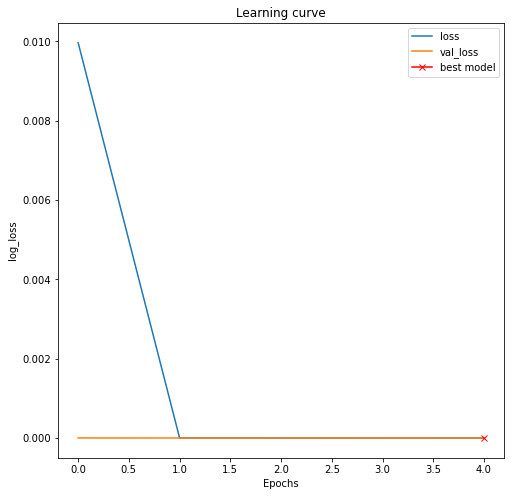

In [28]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(hist2.history["loss"], label="loss")
plt.plot(hist2.history["val_loss"], label="val_loss")
plt.plot( np.argmin(hist2.history["val_loss"]), np.min(hist2.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

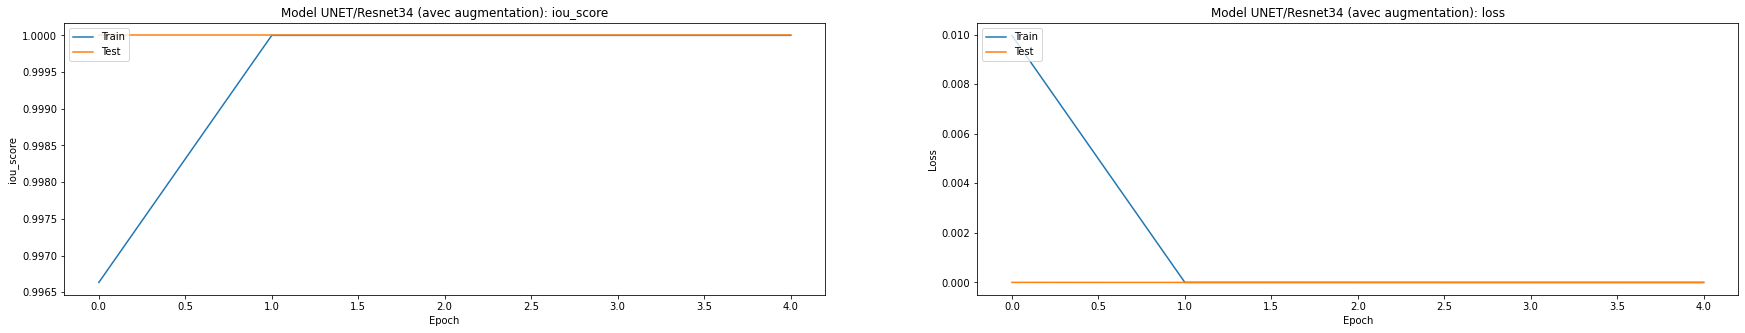

In [29]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hist2.history['iou_score'])
plt.plot(hist2.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (avec augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model UNET/Resnet34 (avec augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Sans augmentation, Backbone: seresnet34 Modèle UNET

In [30]:
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 10

# define network parameters
n_classes = 8  #multiclass segmentation
activation = 'softmax'

#create model
model3 = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)

In [31]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [32]:
mode_autosave3 = ModelCheckpoint('./outputsl3/checkpoint',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_iou_score',
                                mode='max',
                                verbose = 1
                                )
# reduces learning rate on plateau
lr_reducer3 = ReduceLROnPlateau(factor = 0.1,
                               cooldown = 5,
                               patience = 5,
                               min_lr = 0.1e-5,
                               monitor='val_loss',
                               mode='min',
                               verbose = 1)
# stop learining as metric on validaton stop increasing
early_stopping3 = EarlyStopping(patience=15,
                                min_delta=0.01,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)
callbacks3 = [mode_autosave3, lr_reducer3, early_stopping3]

In [33]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)

model3.compile(
    optim,
    loss=cce,
    metrics=metrics,
)

In [34]:
#generate data
# Parameters
param = {'n_classes': 8,
            'prob': 0.5,
          'batch_size': 8,
          'shuffle': False
         }
# Generators
train_gene = GenerateurDatasansaug('./train/', './trainLabel/', train, trainLabel, 
                                   **param)
param_val = {'n_classes': 8,
            'prob': 0,
          'batch_size': 8,
          'shuffle': False
         }
valid_gene = GenerateurDatasansaug('./val/', './valLabel/',val, valLabel, 
                                     **param_val)

In [ ]:
%%time
hist3 = model3.fit_generator(train_gene, shuffle =True,
                  epochs=30, workers=4, use_multiprocessing=True,
                  validation_data = valid_gene, callbacks=callbacks3,                    
                  verbose = 1)


## Sans augmentation,  Modèle UNET

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(hist3.history["loss"], label="loss")
plt.plot(hist3.history["val_loss"], label="val_loss")
plt.plot( np.argmin(hist3.history["val_loss"]), np.min(hist3.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hist3.history['iou_score'])
plt.plot(hist3.history['val_iou_score'])
plt.title('Model UNET/Resnet34 (Sans augmentation): iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model UNET/Resnet34 (avec augmentation): loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualisation des résultats avec le dataset de test

In [21]:
# pre-processing function
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [22]:
BACKBONE = 'seresnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50

optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)


model_p = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, input_shape=(256,256,3), classes=8, activation=activation)
model_p.compile(optimizer=optim, loss=dice_loss, metrics=metrics)
model_p.load_weights('outputsl2/checkpoint')

In [23]:
BACKBONE = 'seresnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50


optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
#create model
model_p3 = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)
model_p3.compile(
    optim,
    loss=cce,
    metrics=metrics,
)
model_p3.load_weights('outputsl3/checkpoint')

In [50]:
BACKBONE = 'seresnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50


optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
#create model
model_p3s = sm.Unet(input_shape=(256,256,3), classes=8, activation=activation)
model_p3s.compile(
    optim,
    loss=cce,
    metrics=metrics,
)
#model_p3s.load_weights('outputsl3/checkpoint')

In [26]:
BACKBONE = 'seresnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50

optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
cce = tf.keras.losses.CategoricalCrossentropy()

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)
#create model
model_p4 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, 
                input_shape=(256,256,3), classes=8, activation=activation)
model_p4.compile(
    optim,
    loss=cce,
    metrics=metrics,
)

In [27]:
BACKBONE = 'seresnet34'
activation = 'softmax'
sm.set_framework('tf.keras')

LR = 0.01
EPOCHS = 50

optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss() 

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.compile(optim, total_loss, metrics)


model_p1 = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, input_shape=(256,256,3), classes=8, activation=activation)
model_p1.compile(optimizer=optim, loss=dice_loss, metrics=metrics)

In [29]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x


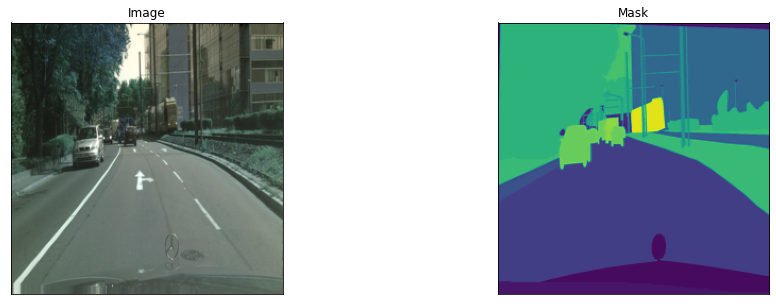

In [32]:
i = 13
image = cv2.imread('./val/' + val[i])
image = resize(image, (256, 256))
mask = cv2.imread('./valLabel/' + valLabel[i])
mask = resize(mask, (256, 256))
visualize(image=image, mask=mask[...,0])

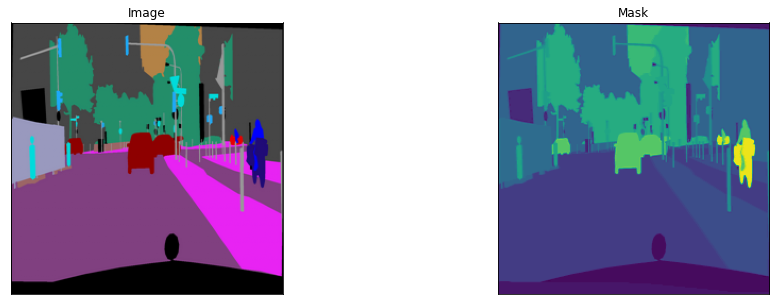

In [33]:
i = 33
image = cv2.imread('./valColor/' + valColor[i])
image = resize(image, (256, 256))
mask = cv2.imread('./valLabel/' + valLabel[i])
mask = resize(mask, (256, 256))
visualize(image=image, mask=mask[...,0])

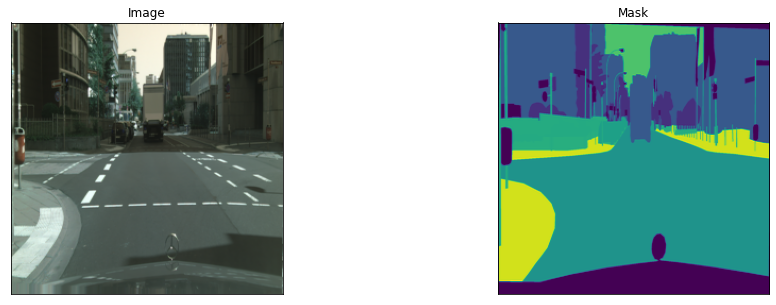

In [34]:
i = 23
image = cv2.imread('./val/' + val[i])
image = resize(image, (256, 256))
mask = cv2.imread('./valColor/' + valColor[i])
mask = resize(mask, (256, 256))
visualize(image=image, mask=mask[...,0])

In [36]:
from albumentations import (
    Compose, RandomBrightness, RandomContrast, RandomGamma,
    ToFloat, OpticalDistortion, GaussNoise
)
#raw = X[0]
preprocess_input = sm.get_preprocessing(BACKBONE)
preprocessing=get_preprocessing(preprocess_input)
aug = Compose([
    #A.ToFloat(max_value=255)
    #A.VerticalFlip(p=self.prob),
    #A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=self.prob),
    A.RandomContrast(limit=0.5, p=1)
    ]
)
augmented = aug(image=image)
raw = preprocessing(image=augmented['image'])
#raw = preprocessing(image=image)

In [37]:
test = raw['image']

In [38]:
test


array([[[0.71923441, 0.84855485, 0.83615428],
        [0.57928485, 0.6412878 , 0.58459938],
        [0.55979824, 0.56334126, 0.49070919],
        ...,
        [0.18423738, 0.19663797, 0.12932047],
        [0.47653708, 0.48185164, 0.4287062 ],
        [0.33127299, 0.34190208, 0.31532937]],

       [[0.6483739 , 0.73872101, 0.72809196],
        [0.52968246, 0.54916912, 0.52259642],
        [0.54916912, 0.55094063, 0.50842428],
        ...,
        [0.19840948, 0.20903857, 0.14172107],
        [0.44464985, 0.45173588, 0.40213352],
        [0.30470029, 0.31710088, 0.28521365]],

       [[0.60585755, 0.6855756 , 0.66077441],
        [0.51019585, 0.52613944, 0.48893768],
        [0.4942522 , 0.53854007, 0.4800801 ],
        ...,
        [0.20903857, 0.21966764, 0.15589318],
        [0.40744805, 0.41453412, 0.36847475],
        [0.27458456, 0.28521365, 0.25686944]],

       ...,

       [[0.38973293, 0.46413651, 0.41807714],
        [0.41099107, 0.46413651, 0.41984865],
        [0.39150444, 0

In [39]:
test.shape

(256, 256, 3)

In [40]:
prediction4 = model_p4.predict(test.reshape(1, *test.shape))
np.unique(prediction4[0].argmax(2))

array([0, 1, 2, 3, 4, 6])

In [41]:
prediction3 = model_p3.predict(test.reshape(1, *test.shape))
np.unique(prediction3[0].argmax(2))

array([0])

In [51]:
prediction3s = model_p3s.predict(test.reshape(1, *test.shape))
np.unique(prediction3s[0].argmax(2))

array([0, 1, 2, 3, 4, 5, 6, 7])

In [43]:
predictionp = model_p.predict(test.reshape(1, *test.shape))
np.unique(predictionp[0].argmax(2))

array([0])

In [44]:
predictionp1 = model_p1.predict(test.reshape(1, *test.shape))
np.unique(predictionp1[0].argmax(2))

array([0, 1, 2, 3, 4, 5, 6])

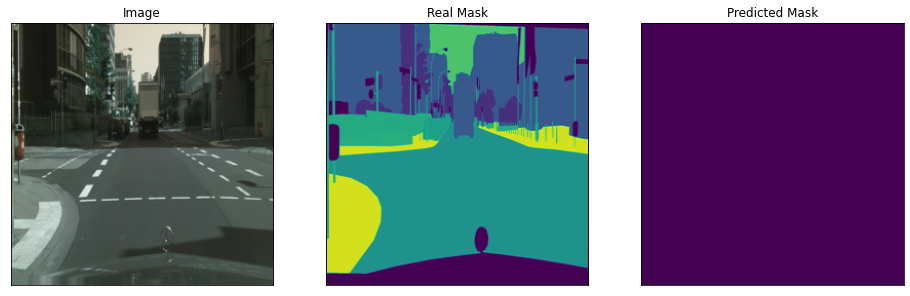

In [45]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=predictionp[0].argmax(2))

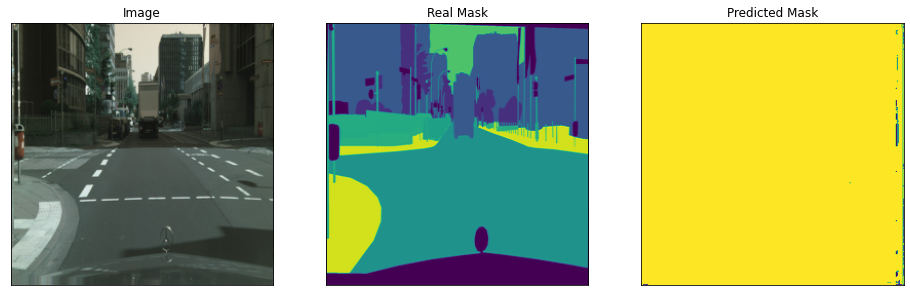

In [46]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=predictionp1[0].argmax(2))

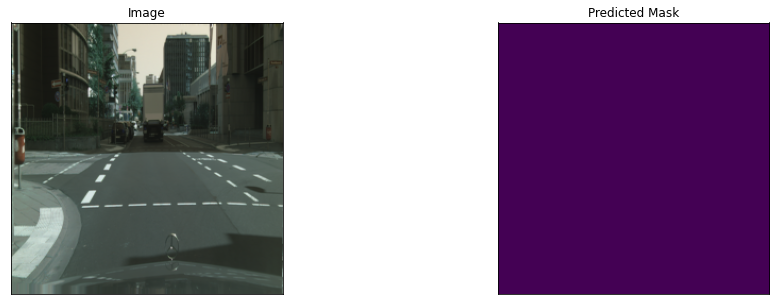

In [47]:
visualize(image=test,  predicted_mask=prediction3[0].argmax(2))

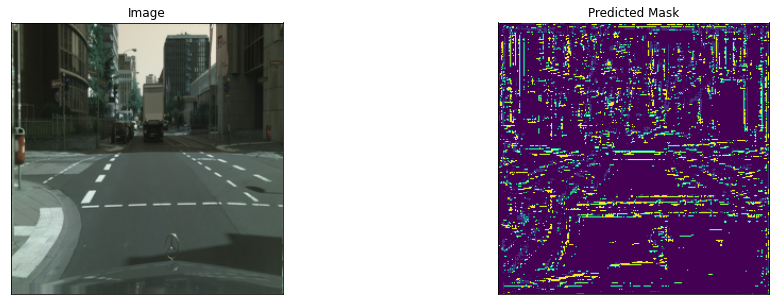

In [52]:
visualize(image=test,  predicted_mask=prediction3s[0].argmax(2))

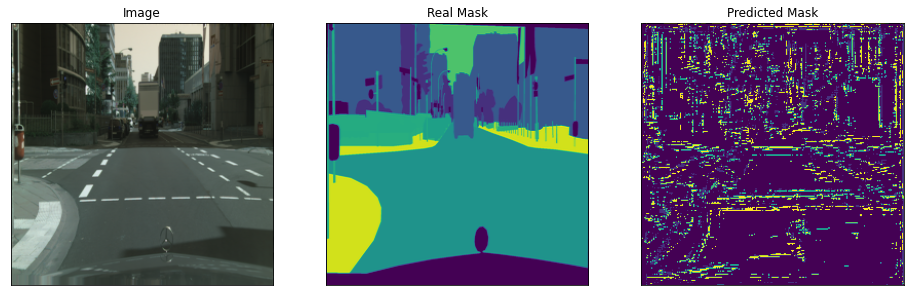

In [53]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction3s[0].argmax(2))

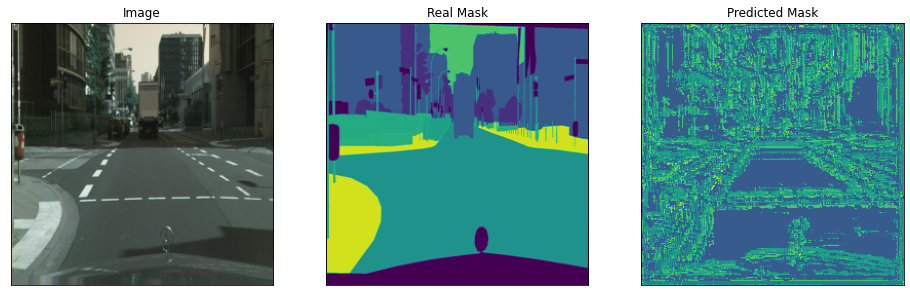

In [54]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction3s[0].argmin(2))

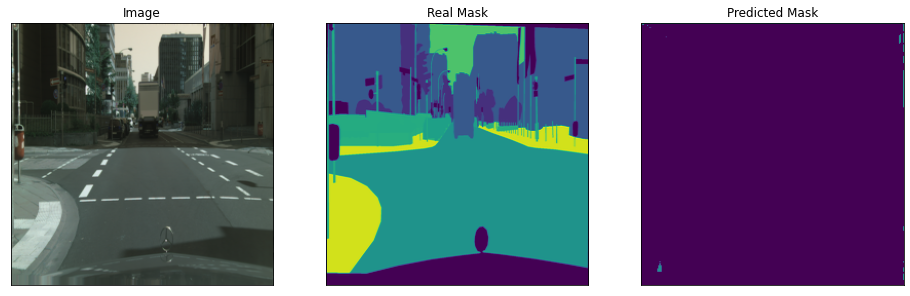

In [55]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction4[0].argmax(2))

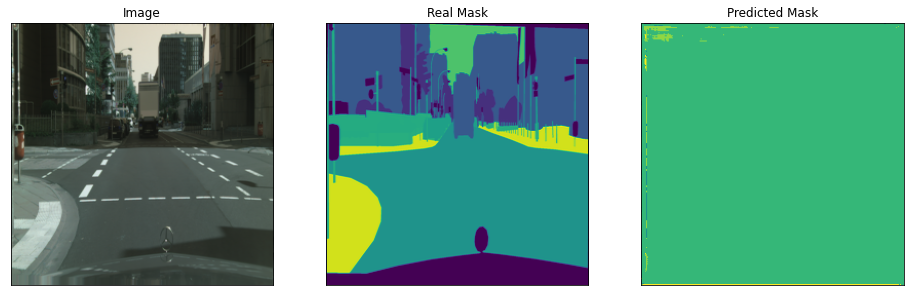

In [56]:
visualize(image=test, real_mask=mask[...,0], predicted_mask=prediction4[0].argmin(2))

In [57]:
!pip install -q pyyaml h5py  

In [58]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model2.save('my_model_.h5')

NameError: name 'model2' is not defined

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model2.save('model8l.h5')

In [59]:
model_p.save('model8lp.h5')

In [ ]:
model_p1.save('model8lp1.h5')

In [ ]:
model_p3.save('model8lp3.h5')

In [ ]:
model_p3s.save('model8lp3s.h5')

In [ ]:
model_p4.save('model8p4.h5')

In [ ]:
prediction = model_p3s.predict(test.reshape(1, *test.shape))
np.unique(prediction[0].argmax(2))

In [ ]:
visualize(predicted_mask=prediction[0].argmax(2))

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model3.save('model83l.h5')

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model4.save('model84l.h5')

In [ ]:
model2.save_weights('Model8wl.h5')

In [ ]:
model3.save_weights('Model83wl.h5')

In [ ]:
model_p.save_weights('Model81w.h5')

In [ ]:
model4.save_weights('Model84wl.h5')